### Requirement:
Jan 17, 2017 
- Annotations are Based on: https://docs.google.com/spreadsheets/d/1RM1xmq9noZyzA97Ca3AgdujziyTb-0lwGlTFjWaiJvc/edit?ts=58797bde#gid=0
1. Read the annotations.h5 file (using h5py, etc);
2. Make some simple plot: scatter, heatmap, etc;
3. Obtain statisitcs data from " ACPreprocessingAnnotator" in the tab of Limited Core, such as: neg_high, neg_low pos_high, pos_low, and vmzero.
4. Reference: http://10.21.56.21/docs/ac-analysis/latest/
5. Look at this for Quantile-Quantile Plot using SciPy http://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy
6. More details for the neg_high http://10.21.56.21/docs/ac-analysis/latest/developer/annotations-list.html?highlight=neg_high

In [1]:
import plotly.plotly as py

In [49]:
import os
import numpy as np
import h5py
import time
#import plotly as py
#import plotly.graph_objs as go
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
%%bash
echo -e "We are on the machine: \"`hostname`\"\n"
#cd /home/genia/azhang/GPU_TEST_HOME/data
echo "File structure is:"
pwd
tree
cd ..
ls

We are on the machine: "merge1"

File structure is:
/home/genia/azhang/GPU_TEST_HOME/notebook
.
├── ACAP_Core_Annotations_Test1_voltage-mode.ipynb
├── ACAP_Core_Annotations_Test2-CVC-Mode (with one voltage mode).ipynb
└── test.annotation.py

0 directories, 3 files
11.10_data-handling_dev
11.12
ACAP_Core_Annotations_Test1-Copy1.ipynb
ACAP_Core_Annotations_Test1-Copy.ipynb
ACAP_Core_Annotations_Test1.ipynb
ACAP_Core_Annotations_Test1-Latest.ipynb
bin
data
data-handling
dvt-server
genia-sqa-old
log
nohup.out
notebook
result
snail-tools
snail-tools_old_16_09_22
snail-tools_provide-single-pore-tolerance
start_ipython_notebook_anaconda2-by-user-conda2-port-9000.log
start_ipython_notebook_Canopy-by-user-genia-port-8888.log
start_ipython_notebook_Canopy-by-user-genia-port-8888.sh
test.txt


## Requirement:
Based on: https://docs.google.com/spreadsheets/d/1RM1xmq9noZyzA97Ca3AgdujziyTb-0lwGlTFjWaiJvc/edit?ts=58797bde#gid=0

#### 1. Read the annotations.h5 file (using h5py, etc);
#### 2. Make some simple plot: heatmap 
#### 3. Obtain statisitcs data from " ACPreprocessingAnnotator" in the tab of Limited Core, such as: neg_high, vmzero. 

In [50]:
# Feb. 16, 2017, Demo for Roger (comparinmg the four histograms for the ....)

filename1 = "/home/genia/rigdata/blastoise/170124_SIG-A_03_blastoise_WAV06R05C15/\
P_00_170124230837_ggc3-keeper_ac-analysis_v11.19.1/annotations.h5"

#filename1="/home/genia/azhang/GPU_TEST_HOME/data/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/\
#P_00_170110023618_v11.19.1/annotations.h5"


anno_one = h5py.File(filename1, 'r')
filename2 = "/home/genia/azhang/GPU_TEST_HOME/data/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle2/\
P_00_170110031255_ggc3-keeper_ac-analysis_v11.19.1/annotations.h5"
anno_two = h5py.File(filename2, 'r')
csvname1="170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/P_00_170110023618_v11.19.1/cell_annotations.csv"

# Files on vmlxu2"
#filename1="/mnt/AGZ_Home_vmwin10/workspace_pOD/genia/Chuck/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/annotations.h5"

#filename2="/mnt/AGZ_Home_vmwin10/workspace_pOD/genia/Chuck/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle2/annotations.h5"

anno_one = h5py.File(filename1, 'r')
anno_two = h5py.File(filename2, 'r')

## Look into the structure for the annotations.h5

In [25]:
anno_one.keys()  # Same as "h5ls annotations.h5"

[u'cells', u'description', u'experiments', u'metadata', u'version']

In [26]:
anno_two.keys()

[u'cells', u'description', u'experiments', u'metadata', u'version']

In [91]:
#anno_one['experiments/primary/exp_anno'].keys()

In [27]:
# There is two types of data objects in h5py : groups and dataset
anno_one['experiments'] # This is a group - similar to a folder in a filesystem

<HDF5 group "/experiments" (9 members)>

In [12]:
print (3)

3


In [28]:
anno_one['experiments'] .keys()

[u'activethinning',
 u'drytest',
 u'electroporation',
 u'oc_calibration',
 u'primary',
 u'run_metadata',
 u'srcm',
 u'vmzero_end',
 u'wet_test']

#### 1) Look into oc_calibration_vmzero: run one vs run two

In [51]:
# dat set one:
vmzero_one = anno_one['experiments/oc_calibration/cell_anno/oc_calibration_vmzero'].value
print ("vmzero_one is:", vmzero_one)

# Data set two:
vmzero_two = anno_two['experiments/oc_calibration/cell_anno/oc_calibration_vmzero'].value
print ("vmzero_two is: ", vmzero_two)


('vmzero_one is:', array([ nan,  nan,  nan, ...,  nan,  nan,  nan], dtype=float32))
('vmzero_two is: ', array([          nan,  139.41577148,  130.67912292, ...,  117.00022888,
        117.09118652,           nan], dtype=float32))


### Chech other "oc_calibration_vmzero"
/home/genia/azhang/GPU_TEST_HOME/data/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/P_00_170110023618_v11.19.1
(genia@merge1)\>grep oc_calibration_vmzero whole_parameters

/experiments/oc_calibration/cell_anno/oc_calibration_vmzero Dataset {131072}

/experiments/oc_calibration/metadata/units/annotations/oc_calibration_vmzero Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero Group
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/annotation_type Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/annotator Dataset {SCALAR}
...
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/experiment_type Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/name Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/schema_type Dataset {SCALAR}
/metadata/schema/annotation/oc_calibration/oc_calibration_vmzero/units Dataset {SCALAR}


/experiments/oc_calibration/vmzero_start Dataset {1}

/experiments/oc_calibration/vmzero_stop Dataset {1}
/experiments/primary/vmzero_start Dataset {1}
/experiments/primary/vmzero_stop Dataset {1}


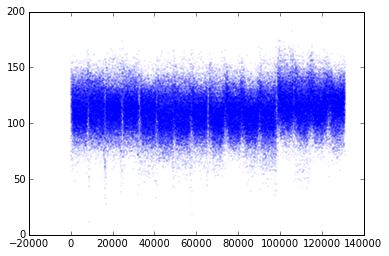

In [30]:
# Scatter plot
plt.scatter(range(vmzero_one.size), vmzero_one, s=.02, alpha=0.5, color='b')

In [31]:
## Plog the Histogram:
# 1. Remove nan first:

vmzero_one_new = vmzero_one[~np.isnan(vmzero_one)]
vmzero_two_new = vmzero_two[~np.isnan(vmzero_two)]
#vmzero_two = vmzero_two[~np.isnan(vmzero_two)]

#vmzero_one_new =[np.logical_not(np.isnan(vmzero_one))]
#print "vmzero_one after remove the nan is: ", vmzero_one_new

#vmzero_two_new =[np.logical_not(np.isnan(vmzero_two))]
#print "vmzero_two after remove the nan is: ", vmzero_two_new
vmzero_one_new

array([  97.12488556,   88.2124176 ,   74.82889557, ...,  102.7518692 ,
        139.7432251 ,  144.66923523], dtype=float32)

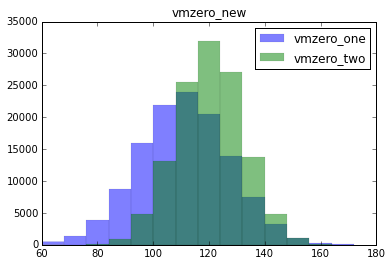

In [32]:

# Plot histogram for vmzero
#plt.hist(vmzero_one_new, bins=20, label = 'vmzero')
plt.hist(vmzero_one_new, bins=np.arange(60,180,8), label = 'vmzero_one', color='b', alpha=0.5, lw=0.1)
plt.hist(vmzero_two_new, bins=np.arange(60,180,8), label = 'vmzero_two', color='g', alpha=0.5, lw=0.1)
plt.legend()
plt.title("vmzero_new");


#### Quantile-Quantile Plot using SciPy

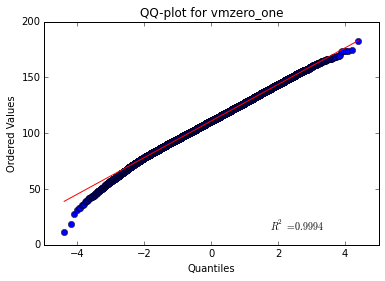

In [33]:
import scipy.stats as stats

stats.probplot(vmzero_one_new, dist="norm", plot=plt)
plt.title("QQ-plot for vmzero_one")
plt.show();

# Interpregation: Slightly light tailed

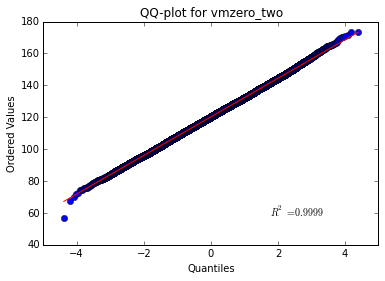

In [34]:
stats.probplot(vmzero_two_new, dist="norm", plot=plt)
plt.title("QQ-plot for vmzero_two")
plt.show()

# Itnerpretation: Very slightly left skew

(array([  2.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          2.20000000e+01,   7.60000000e+01,   2.74000000e+02,
          7.20000000e+02,   2.30000000e+03,   6.32800000e+03,
          1.35470000e+04,   2.13450000e+04,   2.55380000e+04,
          2.31950000e+04,   1.63010000e+04,   8.57500000e+03,
          3.57000000e+03,   1.14900000e+03,   2.69000000e+02,
          3.90000000e+01,   3.00000000e+00]),
 array([  11.07516384,   19.63535295,   28.19554205,   36.75573115,
          45.31592026,   53.87610936,   62.43629847,   70.99648757,
          79.55667667,   88.11686578,   96.67705488,  105.23724399,
         113.79743309,  122.35762219,  130.9178113 ,  139.4780004 ,
         148.03818951,  156.59837861,  165.15856771,  173.71875682,
         182.27894592]),
 <a list of 20 Patch objects>)

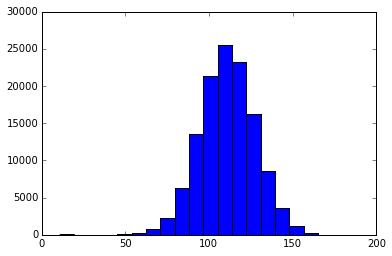

In [35]:
# Plot histogram
plt.hist(vmzero_one_new, bins=20, label = 'vmzero')

(array([  1.00000000e+00,   1.00000000e+00,   5.00000000e+00,
          3.90000000e+01,   2.30000000e+02,   8.51000000e+02,
          2.90000000e+03,   6.56000000e+03,   1.22160000e+04,
          1.92320000e+04,   2.28490000e+04,   2.31200000e+04,
          1.77090000e+04,   1.01620000e+04,   5.07600000e+03,
          1.91100000e+03,   5.80000000e+02,   1.74000000e+02,
          4.60000000e+01,   9.00000000e+00]),
 array([  56.86821365,   62.71192608,   68.5556385 ,   74.39935093,
          80.24306335,   86.08677578,   91.9304882 ,   97.77420063,
         103.61791306,  109.46162548,  115.30533791,  121.14905033,
         126.99276276,  132.83647518,  138.68018761,  144.52390003,
         150.36761246,  156.21132488,  162.05503731,  167.89874973,
         173.74246216]),
 <a list of 20 Patch objects>)

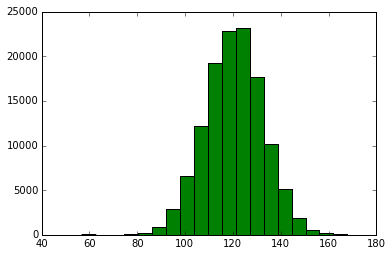

In [36]:
plt.hist(vmzero_two_new, bins=20, label = 'vmzero', color='g')

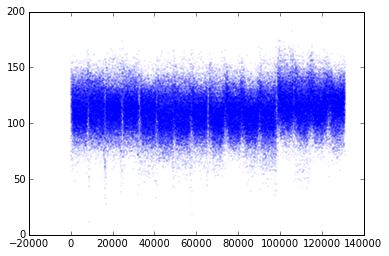

In [37]:
#plt.scatter(range(vmzero_one.size), vmzero_one_new, s=.02, alpha=0.5, color='b')
plt.scatter(range(vmzero_one.size), vmzero_one, s=.02, alpha=0.5, color='b')
#plt.show()

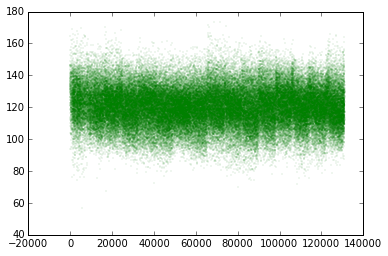

In [38]:
# data two:
plt.scatter(range(vmzero_two.size), vmzero_two, s=.02, alpha=0.5, color='g')

## Combine two data set into one:

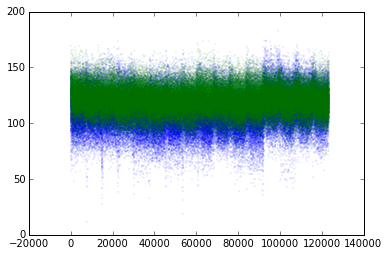

In [39]:
# There is two types of data objects in h5py : groups and dataset
anno_one['experiments'] # This is a group - similar to a folder in a filesystem

# This is a datset, similar to a file
anno_two['experiments/oc_calibration/cell_anno/oc_calibration_vmzero']

# Then to extract the actual data, use .value
vmzero_one = anno_one['experiments/oc_calibration/cell_anno/oc_calibration_vmzero'].value
vmzero_two = anno_two['experiments/oc_calibration/cell_anno/oc_calibration_vmzero'].value

vmzero_one = vmzero_one[~np.isnan(vmzero_one)]
vmzero_two = vmzero_two[~np.isnan(vmzero_two)]
#assert vmzero_one.size == vmzero_two.size
#np.testing.assert_almost_equal(vmzero_one, vmzero_two)

plt.scatter(range(vmzero_one.size), vmzero_one, s=.02, alpha=0.5, color='b')
plt.scatter(range(vmzero_two.size), vmzero_two, s=.02, alpha=0.5, color='g')
plt.show()

### A few statistics

('Mean for vmzero is:', 110.9465)
('Standard Deviation is: ', 16.401026)
('Variance is: ', 268.99365)
('neg_high_one_new_diff is: ', array([-13.82161713, -22.73408508, -36.11760712, ...,  -8.19463348,
        28.79672241,  33.72273254], dtype=float32))


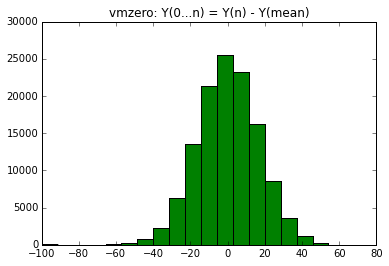

In [40]:
# plot vmzero_one_new_diff
print ("========================")
print ("Mean for vmzero is:", vmzero_one_new.mean())
print ("Standard Deviation is: ", vmzero_one_new.std())
print ("Variance is: ", vmzero_one_new.var())

vmzero_one_new_diff = vmzero_one_new - vmzero_one_new.mean()
print ("========================")
print ("neg_high_one_new_diff is: ",vmzero_one_new_diff)
print ("========================")
plt.hist(vmzero_one_new_diff, bins=20)

plt.hist(vmzero_one_new_diff, bins=20, color='g');
vmzero_one_new_diff
plt.title("vmzero: Y(0...n) = Y(n) - Y(mean)")  # Need a better way to describe the function!!!


In [31]:
vmzero_one_new

array([ 132.03198242,  134.09640503,  107.95144653, ...,  111.78501129,
        111.48249054,  117.55555725], dtype=float32)

### Compariing the differences for the two runs

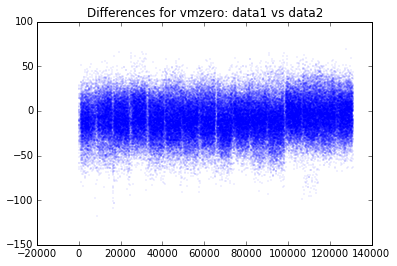

In [41]:
# There is two types of data objects in h5py : groups and dataset
anno_one['experiments'] # This is a group - similar to a folder in a filesystem

# This is a datset, similar to a file
anno_two['experiments/oc_calibration/cell_anno/oc_calibration_vmzero']

# Then to extract the actual data, use .value
vmzero_one = anno_one['experiments/oc_calibration/cell_anno/oc_calibration_vmzero'].value
vmzero_two = anno_two['experiments/oc_calibration/cell_anno/oc_calibration_vmzero'].value

vmzero_diff = vmzero_one - vmzero_two

plt.scatter(range(vmzero_diff.size), vmzero_diff, s=.02, alpha=0.5, color='b')
plt.title("Differences for vmzero: data1 vs data2")
plt.show()


# Check the following
(Feb. 2, 2017)
The mean of the each value  for the following:
## 1) neg_high, 2) neg_low, 3) pos_high, 4) pos_low, and 5)vmzero.

Y(n) = Y(i) - Mean (Y)

plot and histgram



### 1) neg_high

In [33]:

file_location1 = "/home/genia/rig70109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle2/\
P_00_170110031255_ggc3-keeper_ac-analysis_v11.19.1"
file_location1

'/home/genia/rig70109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle2/P_00_170110031255_ggc3-keeper_ac-analysis_v11.19.1'

In [43]:
neg_high_one = anno_one['experiments/primary/rep_anno/neg_high'].value
neg_high_one

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

('neg_high before cleanning: ', array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32))
('neg_high after cleanning: ', array([ -8.39630032,  -8.33468342,  -8.48366165, ..., -58.36524963,
       -73.76698303, -92.01311493], dtype=float32))


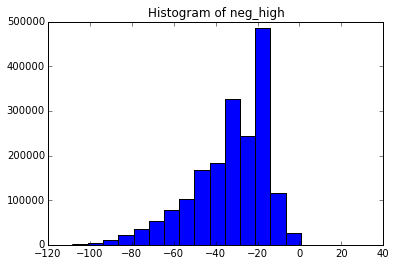

In [44]:
# Remove nan
#neg_high_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
neg_high_one_new = neg_high_one[~np.isnan(neg_high_one)]
neg_high_one_new
"Mean for neg_high is:", neg_high_one_new.mean()
"Standard Deviation is: ", neg_high_one_new.std()

print ("neg_high before cleanning: ", neg_high_one)
print ("==================")
print ("neg_high after cleanning: ",neg_high_one_new)
plt.hist(neg_high_one_new, bins = 20)
plt.title("Histogram of neg_high")

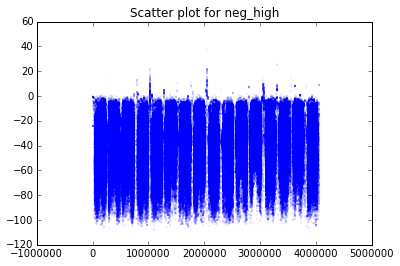

In [45]:
# Scatter plot
plt.scatter(range(neg_high_one.size), neg_high_one, s=.02, alpha=0.5, color='b')
plt.title("Scatter plot for neg_high")

###  Variance, mean, and Y(0...n) =   Y(n) - Y(mean) pot

('neg_high_one_new_diff is: ', array([ 24.41007614,  24.47169495,  24.32271576, ..., -25.55887222,
       -40.96060562, -59.20673752], dtype=float32))
('neg_high_one_new.mean is: ', -32.806377)
('neg_high_one_new.variance is: ', 320.63034)


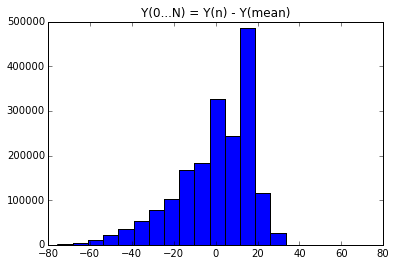

In [46]:
neg_high_one_new_diff = neg_high_one_new - neg_high_one_new.mean()
print ("neg_high_one_new_diff is: ",neg_high_one_new_diff)
print ("==================")
plt.hist(neg_high_one_new_diff, bins=20)

plt.title("Y(0...N) = Y(n) - Y(mean)")  # Need a better way to describe the function!!!

print ("neg_high_one_new.mean is: ", neg_high_one_new.mean())
print ("==================")
print ("neg_high_one_new.variance is: ", neg_high_one_new.var())


#### Quantile-Quantile Plot using SciPy

((array([-4.94888359, -4.77336041, -4.67858571, ...,  4.67858571,
          4.77336041,  4.94888359]),
  array([-108.31603241, -107.32150269, -106.32998657, ...,   25.10075188,
           26.03763771,   36.97336578], dtype=float32)),
 (17.264656733330639, -32.806362152099616, 0.96417185311942855))

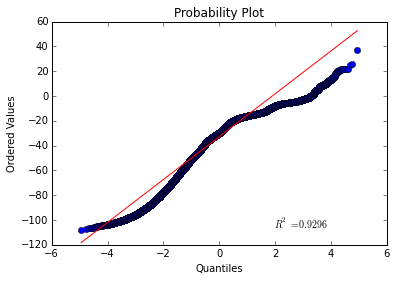

In [47]:
stats.probplot(neg_high_one_new, dist="norm", plot=plt)

#### 2) neg_low

In [48]:
neg_low_one = anno_one['experiments/primary/rep_anno/neg_low'].value
neg_low_one

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

neg_low_one_new is:  [-15.82650375 -14.90199852 -29.95208168 ..., -15.62517452 -17.76834297
 -44.0656929 ]
Mean for neg_low is: -38.9924
Standard Deviation is:  14.9001
neg_high_one_new.variance is:  222.014


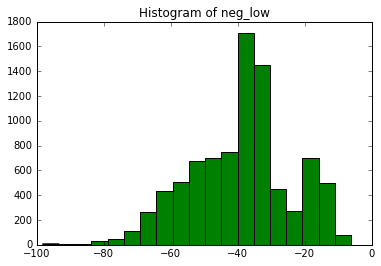

In [40]:
# Remove nan
#neg_high_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
neg_low_one_new = neg_low_one[~np.isnan(neg_low_one)]
print ("neg_low_one_new is: ", neg_low_one_new)
print ("==================")
print ("Mean for neg_low is:", neg_low_one_new.mean())
print ("==================")
print ("Standard Deviation is: ", neg_low_one_new.std())
print ("==================")
print ("neg_high_one_new.variance is: ", neg_low_one_new.var())

#print neg_high_one
plt.hist(neg_low_one_new, bins = 20, color='g')
plt.title("Histogram of neg_low")

### A few statistics summary for neg_low_one

In [58]:
print ("calc mean, diff, and their plot")
print ("==================================")
print ("neg_low_one_new.mean is:", neg_low_one_new.mean())

print ("==================")


calc mean, diff, and their plot
neg_low_one_new.mean is: -38.9924


((array([-3.7760456 , -3.54895349, -3.42418741, ...,  3.42418741,
          3.54895349,  3.7760456 ]),
  array([-98.20095062, -98.18791962, -96.60375977, ...,  -6.34068727,
          -5.28598499,  -1.22193003], dtype=float32)),
 (14.761760891691958, -38.992397308349609, 0.99031083945175702))

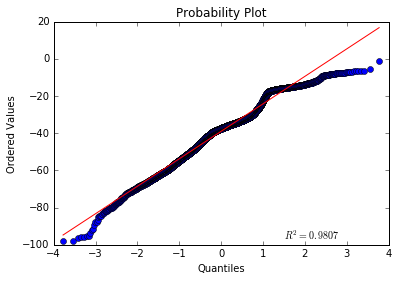

In [62]:
stats.probplot(neg_low_one_new, dist="norm", plot=plt)

### 3) pos_high 

In [43]:
pos_high_one = anno_one['experiments/primary/rep_anno/pos_high'].value
pos_high_one 

array([[ nan],
       [ nan],
       [ nan],
       ..., 
       [ nan],
       [ nan],
       [ nan]], dtype=float32)

Mean for pos_high is: 35.5981
Standard Deviation is:  16.8364


(array([  172.,   508.,  1621.,  1787.,   552.,   595.,  1422.,  1191.,
          302.,   113.,   183.,    57.,    44.,    37.,    35.,    20.,
           33.,    15.,    10.,     3.]),
 array([   4.91226244,   10.95377624,   16.99529004,   23.03680384,
          29.07831764,   35.11983144,   41.16134524,   47.20285904,
          53.24437284,   59.28588665,   65.32740045,   71.36891425,
          77.41042805,   83.45194185,   89.49345565,   95.53496945,
         101.57648325,  107.61799705,  113.65951085,  119.70102465,
         125.74253845]),
 <a list of 20 Patch objects>)

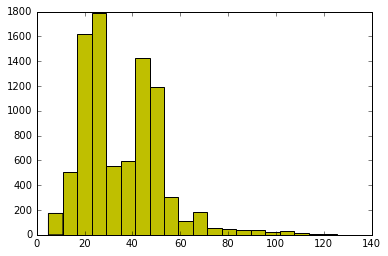

In [44]:
# Remove nan
#neg_high_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
pos_high_one_new = pos_high_one[~np.isnan(pos_high_one)]
#print pos_high_one_new
print ("Mean for pos_high is:", pos_high_one_new.mean())
print ("Standard Deviation is: ", pos_high_one_new.std())
#print neg_high_one
plt.hist(pos_high_one_new, bins = 20, color='y')

In [137]:
#plt.scatter(range(pos_high_one.size), pos_high_one, s=.02, alpha=0.5, color='b')

/home/conda3/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


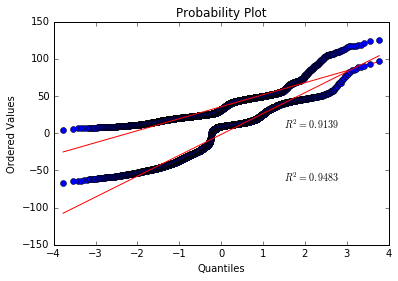

In [63]:
stats.probplot(pos_high_one_new, dist="norm", plot=plt)
stats.probplot(pos_low_one_new, dist="norm", plot=plt)
plt.legend()

#### 4. pos_low

In [47]:
pos_low_one = anno_one['experiments/primary/rep_anno/pos_low'].value
pos_low_one 

array([[ nan],
       [ nan],
       [ nan],
       ..., 
       [ nan],
       [ nan],
       [ nan]], dtype=float32)

pos_low_one_new is:  [ 12.69258785   6.72996902  39.86223984 ...,  11.4121027   13.50029564
  18.55329323]
Mean for pos_low is: -1.68911
Standard Deviation is:  28.7778


(array([   40.,   277.,   609.,   652.,   810.,   736.,   339.,    83.,
          438.,  2459.,   774.,   396.,   475.,   487.,    89.,    13.,
            8.,     5.,     6.,     4.]),
 array([-66.72924805, -58.51988945, -50.31053085, -42.10117226,
        -33.89181366, -25.68245506, -17.47309647,  -9.26373787,
         -1.05437927,   7.15497932,  15.36433792,  23.57369652,
         31.78305511,  39.99241371,  48.20177231,  56.41113091,
         64.6204895 ,  72.8298481 ,  81.0392067 ,  89.24856529,  97.45792389]),
 <a list of 20 Patch objects>)

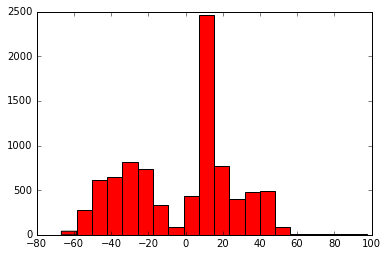

In [48]:
# Remove nan
#pos_low_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
pos_low_one_new = pos_low_one[~np.isnan(pos_low_one)]
print ("pos_low_one_new is: ", pos_low_one_new)
print ("Mean for pos_low is:", pos_low_one_new.mean())
print ("Standard Deviation is: ", pos_low_one_new.std())
plt.hist(pos_low_one_new, bins = 20, color='r')

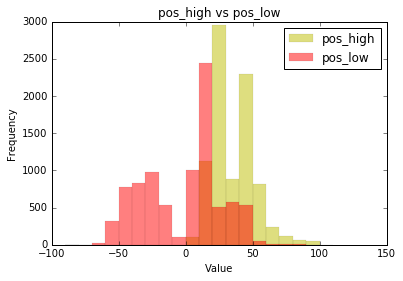

In [49]:
# Plot histogram for compare pos_high vs pos_low
#plt.hist(vmzero_one_new, bins=20, label = 'vmzero')
plt.hist(pos_high_one_new, bins=np.arange(-90,110,10), label = 'pos_high', color='y', alpha=0.5, lw=0.1)
plt.hist(pos_low_one_new, bins=np.arange(-90,120,10), label = 'pos_low', color='r', alpha=0.5, lw=0.1)
plt.legend()
plt.title("pos_high vs pos_low");
plt.xlabel("Value")
plt.ylabel("Frequency")


((array([-3.7760456 , -3.54895349, -3.42418741, ...,  3.42418741,
          3.54895349,  3.7760456 ]),
  array([-66.72924805, -64.5795517 , -63.83568573, ...,  90.3223114 ,
          93.039505  ,  97.45792389], dtype=float32)),
 (28.035567117903341, -1.6891092061996522, 0.97381291300177775))

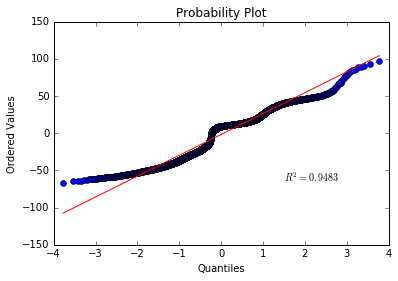

In [50]:
stats.probplot(pos_low_one_new, dist="norm", plot=plt)


#### 2-1 Check oc_calibration_neg_low (vs neg_low)

In [64]:
#neg_low_one = anno_one['experiments/primary/rep_anno/neg_low'].value
print ("neg_low_one is: ", neg_low_one)
print ("===================\n")

# experiments/oc_calibration/cell_anno/oc_calibration_neg_low
oc_calibration_neg_low_one = anno_one['experiments/oc_calibration/cell_anno/oc_calibration_neg_low'].value
print ("oc_calibration_neg_low_one is: ", oc_calibration_neg_low_one)

neg_low_one is:  [[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]

oc_calibration_neg_low_one is:  [         nan          nan          nan ..., -16.98249054 -16.05555725
          nan]


oc_calibration_neg_low_one_new is:  [-25.95144653 -23.70354462 -13.7105484  ..., -16.88678741 -16.98249054
 -16.05555725]
Mean for oc_calibration_neg_low_one is: -21.302
Standard Deviation is:  10.3316
variance is:  106.742


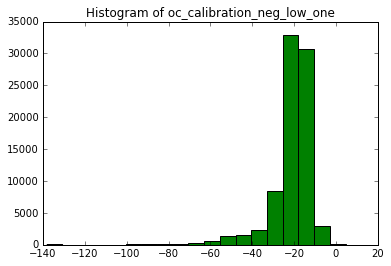

In [65]:
# 2After eliminate the "nan"

# Remove nan
#neg_high_one_new = neg_high_one[np.logical_not(np.isnan(neg_high_one))]
oc_calibration_neg_low_one_new = oc_calibration_neg_low_one[~np.isnan(oc_calibration_neg_low_one)]
print ("oc_calibration_neg_low_one_new is: ", oc_calibration_neg_low_one_new)
print ("==================")
print ("Mean for oc_calibration_neg_low_one is:", oc_calibration_neg_low_one_new.mean())
print ("==================")
print ("Standard Deviation is: ", oc_calibration_neg_low_one_new.std())
print ("==================")
print ("variance is: ", oc_calibration_neg_low_one_new.var())

#print neg_high_one

plt.hist(oc_calibration_neg_low_one_new, bins = 20, color='g')
plt.title("Histogram of oc_calibration_neg_low_one")




((array([-4.30192074, -4.10120424, -3.99196218, ...,  3.99196218,
          4.10120424,  4.30192074]),
  array([-138.13165283, -132.33892822, -130.11694336, ...,    6.78804779,
            7.89472198,   12.09827423], dtype=float32)),
 (8.6587141256249041, -21.301954269409176, 0.83803783000948229))

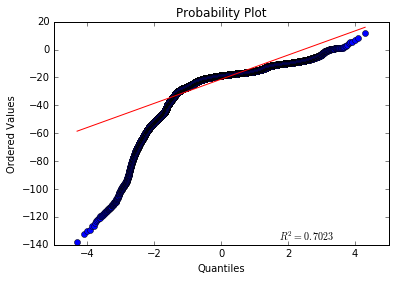

In [66]:
# run q-q test
stats.probplot(oc_calibration_neg_low_one_new, dist="norm", plot=plt)

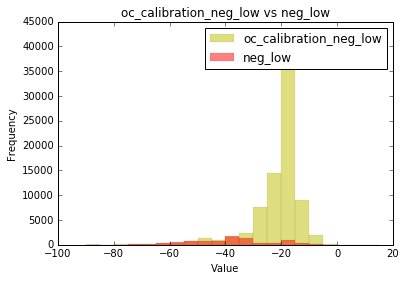

In [67]:
# Will this make sense: oc_calibration_neg_low vs neg_low
# Plot histogram for compare pos_high vs pos_low
#plt.hist(vmzero_one_new, bins=20, label = 'vmzero')
plt.hist(oc_calibration_neg_low_one_new, bins=np.arange(-90,20,5), label = 'oc_calibration_neg_low', color='y', alpha=0.5, lw=0.1)
plt.hist(neg_low_one_new, bins=np.arange(-90, 20,5), label = 'neg_low', color='r', alpha=0.5, lw=0.1)
plt.legend()
plt.title("oc_calibration_neg_low vs neg_low");
plt.xlabel("Value")
plt.ylabel("Frequency")

### 6) oc_calibration_pos_cycle_decay_range

In [70]:
oc_calibration_pos_cycle_decay_range_one = \
anno_one['experiments/oc_calibration/cell_anno/oc_calibration_pos_cycle_decay_range'].value
print ("oc_calibration_pos_cycle_decay_range_one is: ", oc_calibration_pos_cycle_decay_range_one)

oc_calibration_pos_cycle_decay_range_one is:  [        nan         nan         nan ...,  0.68960571  1.13815308
         nan]


In [73]:
# Remove nan
oc_calibration_pos_cycle_decay_range_one_new = oc_calibration_pos_cycle_decay_range_one\
[~np.isnan(oc_calibration_pos_cycle_decay_range_one)]
print ("oc_calibration_pos_cycle_decay_range_one_new is: ", \
       oc_calibration_pos_cycle_decay_range_one_new)



oc_calibration_pos_cycle_decay_range_one_new is:  [ 1.8243103   1.5435791   0.72877502 ...,  0.88955688  0.68960571
  1.13815308]


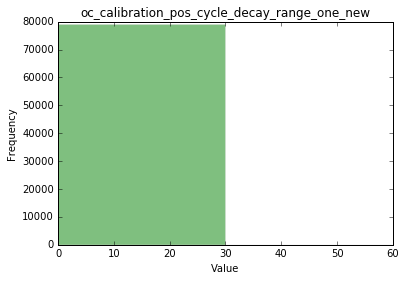

In [86]:
plt.hist(oc_calibration_pos_cycle_decay_range_one_new, bins=2, \
         label = 'oc_calibration_pos_cycle_decay_range_one_new ',\
         color='g', alpha=0.5, lw=0.1)
plt.title("oc_calibration_pos_cycle_decay_range_one_new");
plt.xlabel("Value")
plt.ylabel("Frequency")


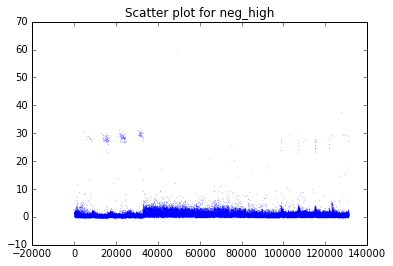

In [88]:
# Scatter plot:
# Scatter plot
plt.scatter(range(oc_calibration_pos_cycle_decay_range_one.size), oc_calibration_pos_cycle_decay_range_one, s=.02, alpha=0.5, color='b')
plt.title("Scatter plot for neg_high")


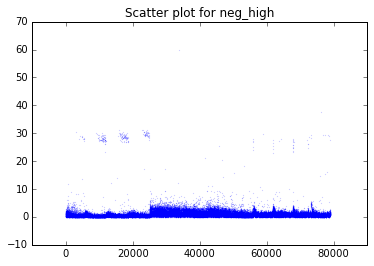

In [89]:
# Scatter plot:
# Scatter plot
plt.scatter(range(oc_calibration_pos_cycle_decay_range_one_new.size), \
            oc_calibration_pos_cycle_decay_range_one_new, s=.02, alpha=0.5, color='b')
plt.title("Scatter plot for neg_high")


# Next Steps:
####==================
#### 1)  plot a few histgram to see if if makes more sense for the distribution of the data
#### 2) Find out the physical meanings for each annotations (where the doc is?)
#### 3) More detailed explainations for the data missing, nan, variations for the data source? etc.)
#### 4) More comparisons: chip vs chip; cycles vs cycles withint the same chip, etc) 


### Appendex: for my practice

#### Plot test

[-1.06529821 -0.45408218  0.20315431  1.2000251   1.75557238  0.13630728
  0.96907159  0.25517795 -0.49174364 -0.41315065]


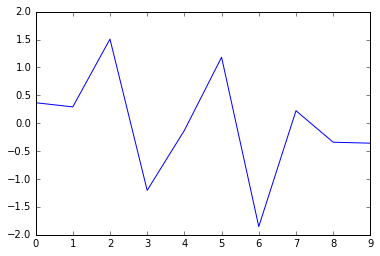

In [299]:
print (randn(10))
plot(randn(10))

Populating the interactive namespace from numpy and matplotlib


### Check the cell_annotations.csv

In [188]:
%%bash
cd "170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/P_00_170110023618_v11.19.1"
pwd
ls


/home/genia/azhang/GPU_TEST_HOME/data/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/P_00_170110023618_v11.19.1
annotations.h5
cell_annotations.csv
test.csv
whole_parameters


In [302]:
%%bash
#cell_annotations = pd.read_csv("cell_annotations.csv")
pwd

/mnt/AGZ_Home_vmwin10/workspace_pOD/genia/Chuck


In [174]:
%%bash
pwd

/home/genia/azhang/GPU_TEST_HOME/data


In [194]:
cell_annotations = pd.read_csv("/home/genia/azhang/GPU_TEST_HOME/data/170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1/P_00_170110023618_v11.19.1/cell_annotations.csv")

In [195]:
cell_annotations.head

<bound method DataFrame.head of                                                 run_id   cell_id  \
0       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0000   
1       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0001   
2       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0002   
3       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0003   
4       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0004   
5       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0005   
6       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0006   
7       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0007   
8       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0008   
9       170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0009   
10      170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0010   
11      170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0011   
12      170109_ENG-SYS_02_wobbuffet_WAV13R07C12_cycle1  b00c0012   
13      170109_E

In [206]:
import plotly

In [208]:
plotly.__version__

'1.13.0'

In [354]:
x = np.random.randn(50)
x

array([ -3.04386962e-01,   6.61417025e-01,  -7.00026364e-01,
         2.42960052e-04,  -3.03840232e-01,   6.55827975e-02,
        -2.06337099e-01,   1.99043911e+00,  -9.67638706e-01,
         1.78173388e+00,  -2.30925398e-01,   6.65690540e-01,
        -2.20543288e-01,  -7.31257447e-01,   2.26288763e+00,
         2.13828708e-01,  -7.03175794e-01,   7.52141319e-01,
        -1.54233492e-02,  -1.33608800e+00,   4.42387992e-01,
         9.06746035e-01,   2.23439449e+00,  -2.25937638e+00,
         1.14271030e+00,  -9.29313488e-01,   1.44226358e+00,
        -1.88372100e+00,  -9.01592707e-01,   5.19125933e-01,
         2.07089115e+00,  -2.74702671e+00,  -6.50601255e-01,
        -1.50039455e+00,  -2.39805641e-01,  -9.18270766e-01,
        -8.16726018e-01,  -6.74964366e-01,  -2.16923445e-01,
        -8.96327399e-01,  -1.34902042e+00,   4.70810555e-01,
        -5.62780899e-01,  -7.88165860e-01,   7.40169318e-01,
        -1.50072440e-01,   3.34214093e-01,  -5.05968067e-01,
        -4.14372249e-01,

In [355]:
data = [
    go.Histogram(
        x=x
    )
]
data

[{'type': 'histogram',
  'x': array([ -3.04386962e-01,   6.61417025e-01,  -7.00026364e-01,
           2.42960052e-04,  -3.03840232e-01,   6.55827975e-02,
          -2.06337099e-01,   1.99043911e+00,  -9.67638706e-01,
           1.78173388e+00,  -2.30925398e-01,   6.65690540e-01,
          -2.20543288e-01,  -7.31257447e-01,   2.26288763e+00,
           2.13828708e-01,  -7.03175794e-01,   7.52141319e-01,
          -1.54233492e-02,  -1.33608800e+00,   4.42387992e-01,
           9.06746035e-01,   2.23439449e+00,  -2.25937638e+00,
           1.14271030e+00,  -9.29313488e-01,   1.44226358e+00,
          -1.88372100e+00,  -9.01592707e-01,   5.19125933e-01,
           2.07089115e+00,  -2.74702671e+00,  -6.50601255e-01,
          -1.50039455e+00,  -2.39805641e-01,  -9.18270766e-01,
          -8.16726018e-01,  -6.74964366e-01,  -2.16923445e-01,
          -8.96327399e-01,  -1.34902042e+00,   4.70810555e-01,
          -5.62780899e-01,  -7.88165860e-01,   7.40169318e-01,
          -1.50072440e-01, 

In [303]:
import ggplot

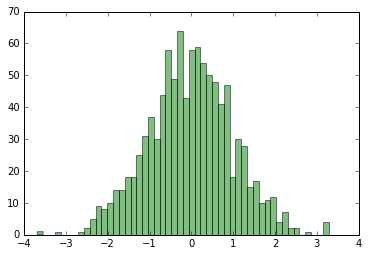

In [235]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.random.normal(0,1,1000)
numBins = 50
ax.hist(x,numBins,color='g',alpha=0.5)
plt.show()

In [239]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


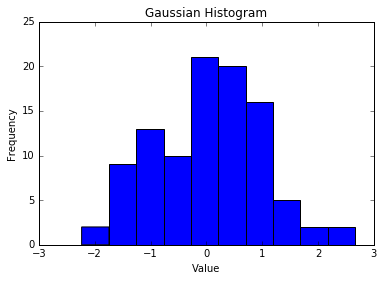

In [239]:
import matplotlib.pyplot as plt
from numpy.random import normal
gaussian_numbers = normal(size=100)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [218]:
import random
import matplotlib.pyplot as plt
x = random.sample(range(1000), 50)
xbins = [0, len(x)]
plt.scatter(x, bins=xbins, color = 'blue') 
#Does not make the histogram correct. It counts the occurances of the individual counts. 
print ("x is: ", x)
print ("xbins is: " , xbins)
#plt.plot(x)
#plot works but I need this in histogram format
#plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

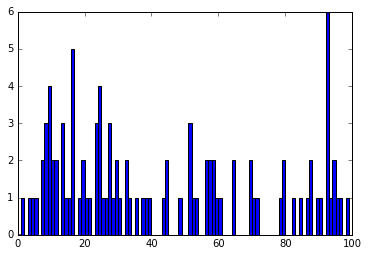

In [43]:
import random
import matplotlib.pyplot as plt
x=[x/100 for x in random.sample(range(10000),100)]
xbins=range(0,len(x))
plt.hist(x, bins=xbins, color='blue')
plt.show()


In [42]:
xbins
# x

range(0, 100)

### Scatter plots
A scatter plot displays values for two numerical variables in the same data set. The Matplotlib scatter func on creates a sca er plot. Op onally, we can specify the color and size of the data points in the plot as well as alpha transparency.

### Histograms
Histograms visualize the distribu on of numerical data. Matplotlib has the handy hist func on that graphs histograms. The hist func on has two arguments—the array containing the data and the number of bars.

In [243]:
abc=3
abc

#print a

3

In [244]:
b=[1,2,3]

In [248]:
import datetime

In [262]:
datetime.time
print (datetime)

<module 'datetime' from '/home/azhang/anaconda3/lib/python3.5/datetime.py'>


In [251]:
def add_numbers(a, b):
    """
    Add two num together
    Returns
    -------
    the_sum: type of arguments
    """
    return a + b

In [257]:
add_numbers??

In [261]:
add_numbers(3, 30)

33

In [256]:
np.*load*?

In [292]:
import matplotlib.pyplot as plt
fig = plt.figure()

In [293]:
ax1 = fig.add_sublot(2, 2, 1)

AttributeError: 'Figure' object has no attribute 'add_sublot'

In [295]:
ax2 = fig.add_subplot(2, 2, 2)

In [296]:
ax3 = fig.add_subplot(2, 2, 3)

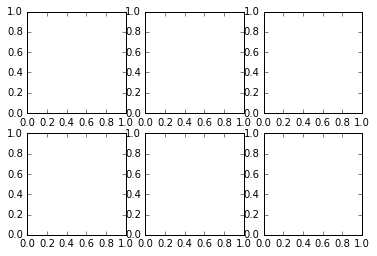

In [297]:
fig, axes = plt.subplots(2, 3)

In [298]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa0262c2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ffa024f55c0>]], dtype=object)

In [285]:
from numpy.random import randn

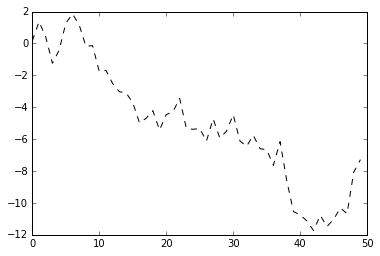

In [286]:
plt.plot(randn(50).cumsum(), 'k--')

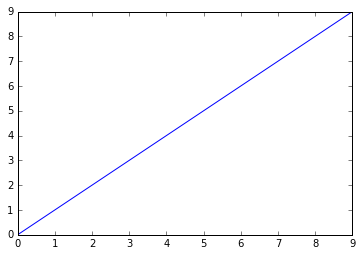

In [277]:

ax1 = fig.add_subplot(2, 2, 1)
plot(np.arange(10))
fig = plt.figure()

In [274]:
arr = np.arange(20,10)
arr

array([], dtype=int64)

TypeError: float() argument must be a string or a number, not 'dict'

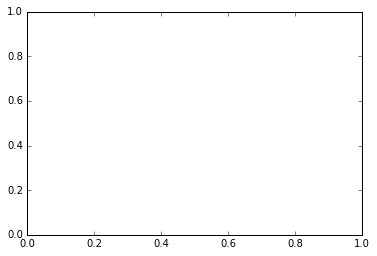

In [201]:
data = {i : randn() for i in range(10)}
data
plot(data)